In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick 
import matplotlib.pyplot as plt


In [2]:
def readcsv_file(file,index_col=None):
    data=[]
    header=[]

    with open(file,'r') as file:
        header=file.readline().strip().split(',')
        
        if index_col and index_col in header:
            index_pos=header.index(index_col)
            header.pop(index_pos)

        for line in file:
            row=line.strip().split(',')
            if index_col:
                index=row.pop(index_pos)
                data.append((index,row))
            else:
                data.append(row)

    if index_col:
        df_data = {header[i]: [row[i] for _, row in data] for i in range(len(header))}
        df = pd.DataFrame(df_data, index=[index for index, _ in data])
        df.index.name = index_col  
    else:
        df_data = {header[i]: [row[i] for row in data] for i in range(len(header))}
        df = pd.DataFrame(df_data)
        
    for column in df.columns:
        df[column] = pd.to_numeric(df[column], errors='ignore')  
    
    return df

In [3]:
df=readcsv_file('CustomerChurn.csv',index_col='customerID')

C:\Users\aksha\AppData\Local\Temp\ipykernel_24956\4259282168.py:29: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[column] = pd.to_numeric(df[column], errors='ignore')


In [4]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 20)

In [6]:
df.columns.values

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [7]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
# Services
# Phone Service (Yes,No)
# Multiple Lines (Yes,No,No Phone Service)
# Internet Service (DSL,Fiber Optic, No)
# Online Security (Yes,No, No Internet Service)
# Online Backup (Yes,No,No Internet Service)
# DeviceProtection (Yes, No, No Internet Service)
# TechSupport (Yes, No, No Internet Service)
# StreamingTV (Yes, No, No Internet Service)
# StreamingMovies (Yes, No, No Internet Service)


In [9]:
# Customer Demographic
# CustomerID — Unique value for each customer
# gender — The type of gender each customer (Female, Male)
# SeniorCitizen — Whether the customer is a senior citizen (Yes, No)
# Partner — Whether the customer has a partner or not (Yes, No)
# Dependents — Whether the customer has a dependent or not (Yes, No)

In [10]:
# Account Information
# Tenure — How long customer has stayed in the company
# Contract — The type of contract the customer has (Month-to-Month, One year, Two years)
# PaperlessBilling — Whether the customer has a paperless billing (Yes, No)
# PaymentMethod — payment method used by the customer (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
# MonthlyCharges — Amount charged to the customer monthly
# TotalCharges — The total amount charged to the customer

PreProcessing Step-1
Total Charges must be numeric column

In [11]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [12]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

PreProcessing Step-2
Null values removal

In [13]:
#Removing missing values 
df.dropna(inplace = True)

Visualization

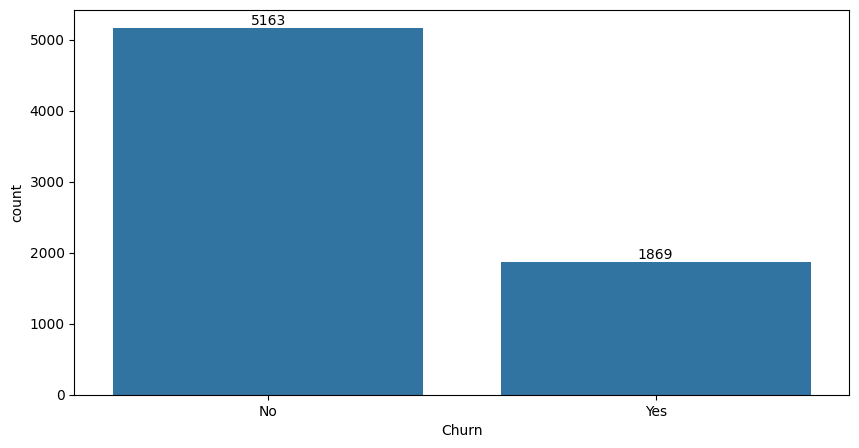

In [14]:
# Churn Analysis

plt.figure(figsize=(10,5))
countplot=sns.countplot(x=df['Churn'])
countplot.bar_label(countplot.containers[0])
plt.show()

Kind of inbalanced data:

The dataset reflects the real-world distribution of churn vs. non-churn customers, where churned customers naturally make up a small percentage. By keeping this imbalance, the model learns to prioritize the majority class (non-churn) while still identifying churn cases based on meaningful patterns, which aligns with the real-world scenario.

Analysis for Services

In [15]:
import warnings
warnings.filterwarnings("ignore")

In [16]:
import math
def plot_countplot(data, columns, target):
    number_of_columns = 2
    number_of_rows = math.ceil(len(columns) / 2)

    fig = plt.figure(figsize=(12, 25))
    for index, column in enumerate(columns, 1):
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)
        sns.countplot(x=column, data=df, hue=target, palette="Blues", ax=ax)
        ax.set_title(f'{column} vs {target}', fontsize=14)
        ax.set_xlabel(column, fontsize=12)
        ax.set_ylabel('Count', fontsize=12)
    
    # Adjust layout to prevent overlap
    plt.tight_layout()
    
    return plt.show()

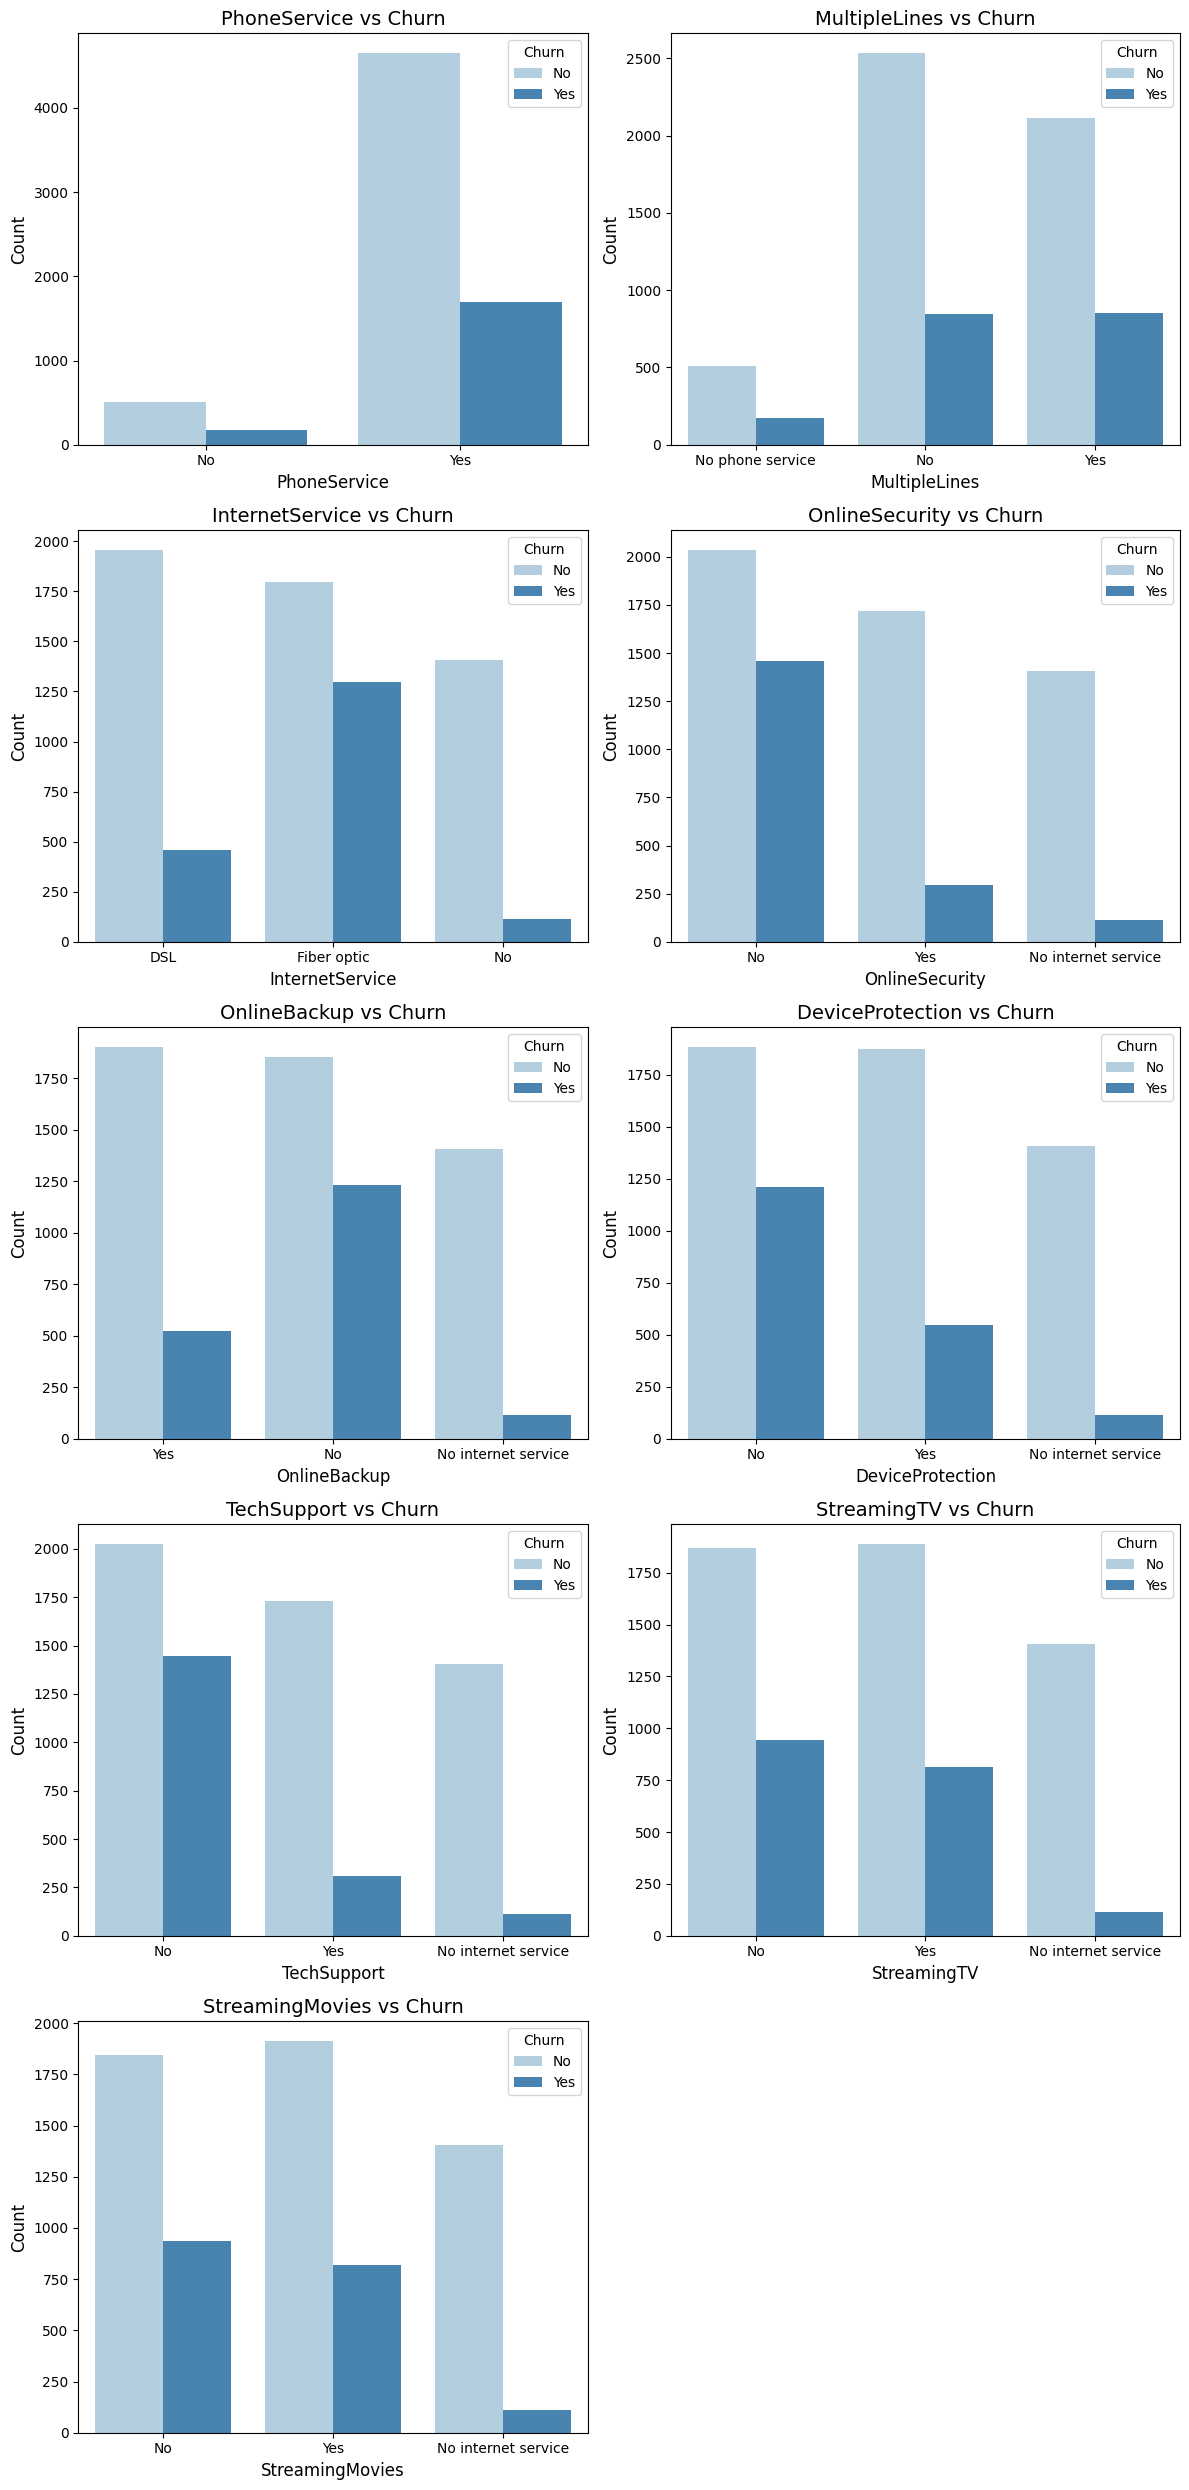

In [17]:
customer_services = ["PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]
plot_countplot(df, customer_services,'Churn')

In [18]:
# plt.figure(figsize=(10,5))
# ax=sns.countplot(x=df['PhoneService'],data=df,hue=df['Churn'])
# plt.show()


High churn rate for customers with phone service

Customers with InterntService as fiberoptic have a higher churn rate compared with DSL and No Internet Service

Higher churn rate for customers without Tech Support or Online Security

Higher churn rate for customers without Online Backup or Device Protection

In [19]:
# plt.figure(figsize=(10,5))
# ax=sns.countplot(x=df['MultipleLines'],data=df,hue=df['Churn'])
# plt.show()


In [20]:
# plt.figure(figsize=(10,5))
# ax=sns.countplot(x=df['InternetService'],data=df,hue=df['Churn'])
# plt.show()


In [21]:
# plt.figure(figsize=(10,5))
# ax=sns.countplot(x=df['OnlineSecurity'],data=df,hue=df['Churn'])
# plt.show()


In [22]:
# plt.figure(figsize=(10,5))
# ax=sns.countplot(x=df['TechSupport'],data=df,hue=df['Churn'])
# plt.show()


In [23]:
# plt.figure(figsize=(10,5))
# ax=sns.countplot(x=df['OnlineBackup'],data=df,hue=df['Churn'])
# plt.show()


In [24]:
# plt.figure(figsize=(10,5))
# ax=sns.countplot(x=df['DeviceProtection'],data=df,hue=df['Churn'])
# plt.show()


Analysis for Customer Account

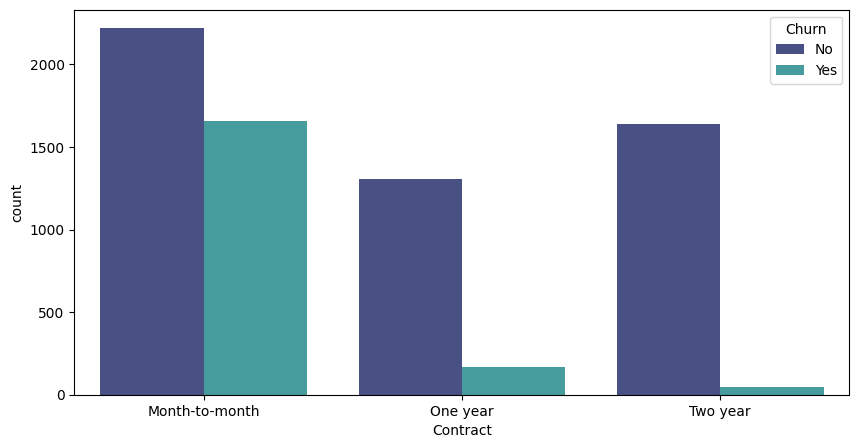

In [25]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x=df['Contract'],data=df,hue=df['Churn'],palette="mako")
plt.show()


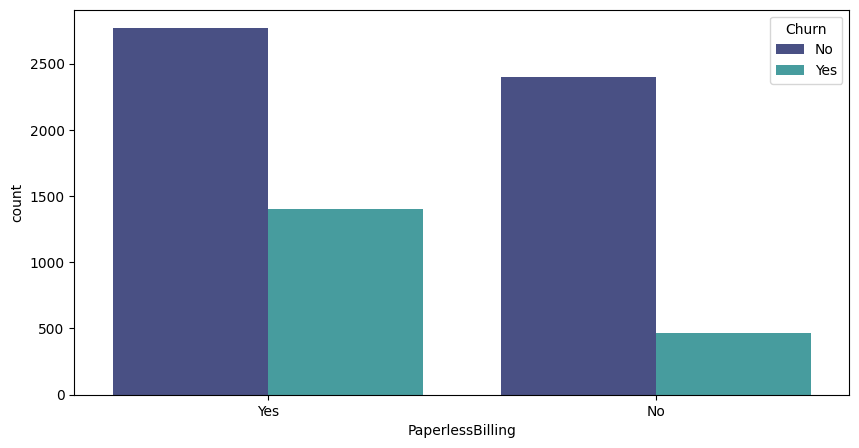

In [26]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x=df['PaperlessBilling'],data=df,hue=df['Churn'],palette="mako")
plt.show()


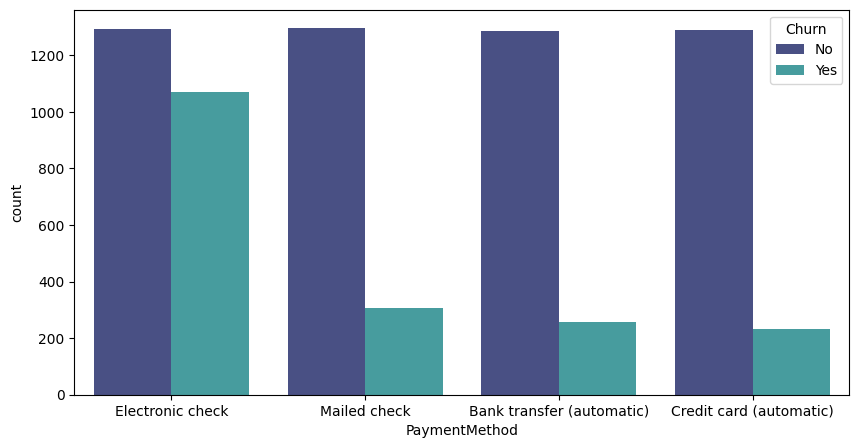

In [27]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x=df['PaymentMethod'],data=df,hue=df['Churn'],palette="mako")
plt.show()


Customers are more likely to churn with month-to-month contracts.

Moderately higher churn rate with electronic check payment method.

Customers with paperless billing have higher churn rates.

Customer Demographic


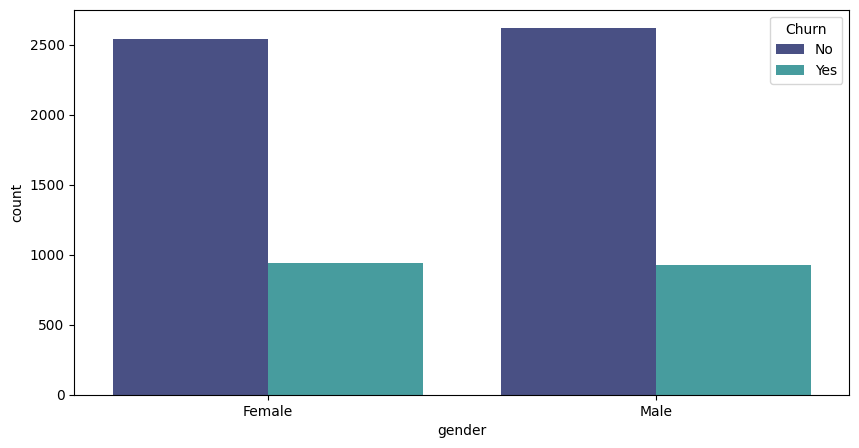

In [28]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x=df['gender'],data=df,hue=df['Churn'],palette="mako")
plt.show()


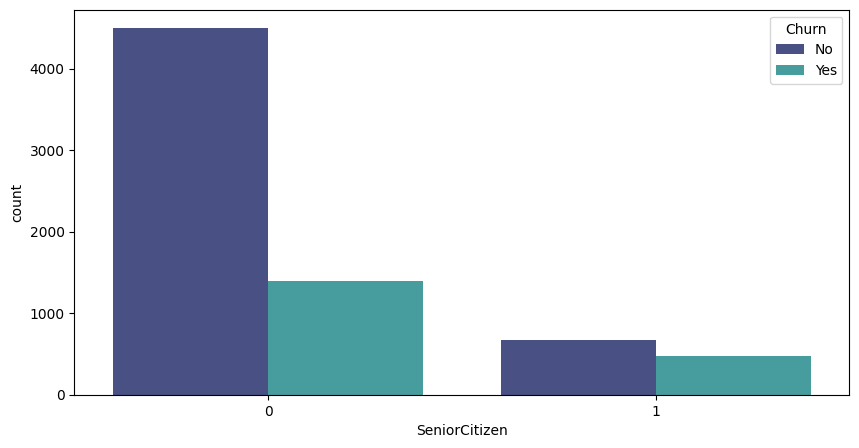

In [29]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x=df['SeniorCitizen'],data=df,hue=df['Churn'],palette="mako")
plt.show()


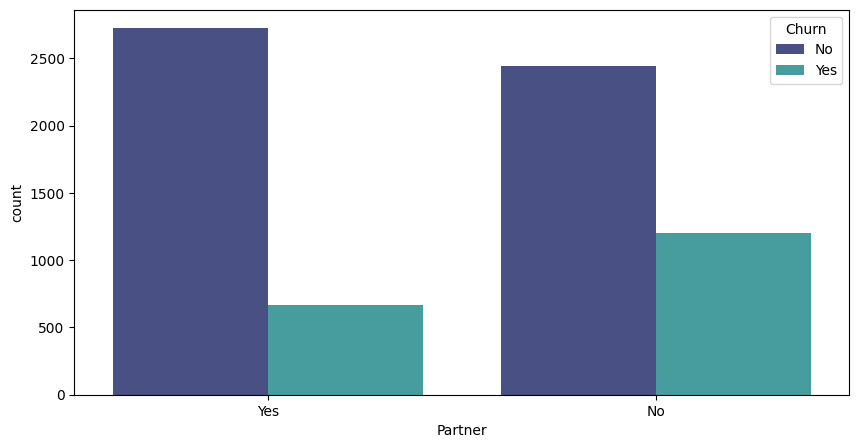

In [30]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x=df['Partner'],data=df,hue=df['Churn'],palette="mako")
plt.show()


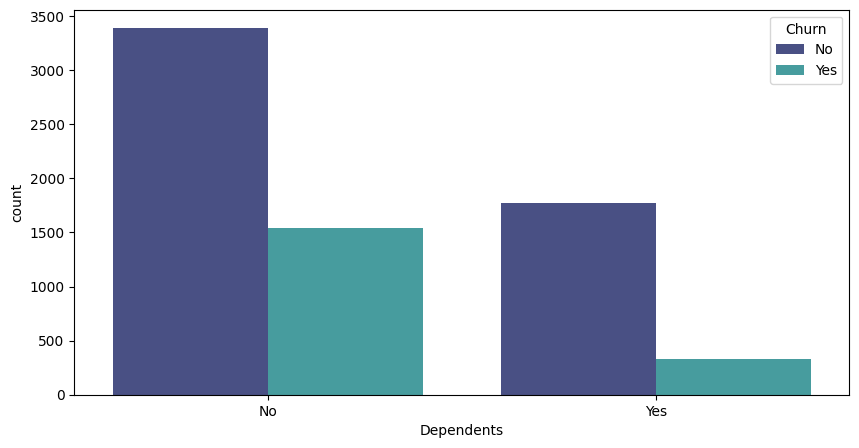

In [31]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x=df['Dependents'],data=df,hue=df['Churn'],palette="mako")
plt.show()


Churn and no churn no have differences for each gender.

Young customers are more likely to churn rather than old customers.

Customers with a partner are less than churn if compared with a partner.


In [32]:
# Numerical Values

Text(0.5, 1.0, 'Tenure')

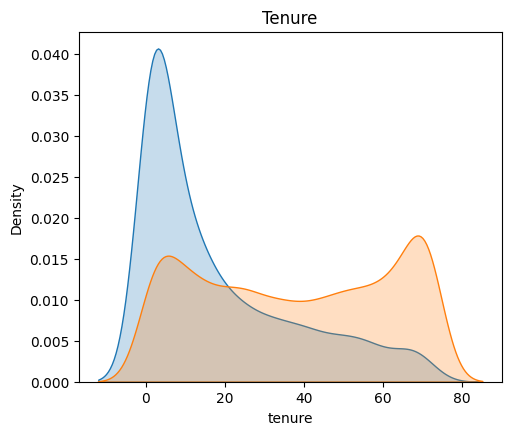

In [33]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(2, 2, 1)
ax = sns.kdeplot(df["tenure"][df["Churn"]=="Yes"] ,fill = True)
ax = sns.kdeplot(df["tenure"][df["Churn"]=="No"], fill = True)
ax.set_title("Tenure")


Text(0.5, 1.0, 'MonthlyCharges')

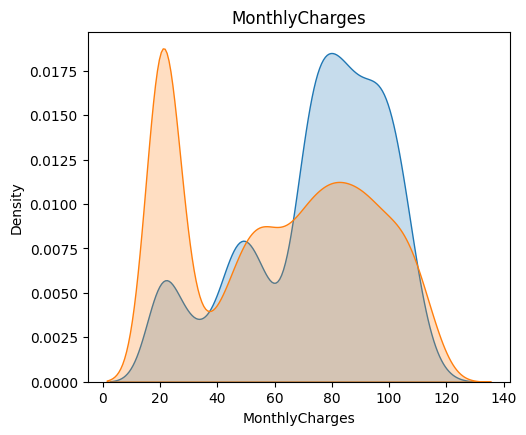

In [34]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(2, 2, 1)
ax = sns.kdeplot(df["MonthlyCharges"][df["Churn"]=="Yes"] ,fill = True)
ax = sns.kdeplot(df["MonthlyCharges"][df["Churn"]=="No"], fill = True)
ax.set_title("MonthlyCharges")


Text(0.5, 1.0, 'TotalCharges')

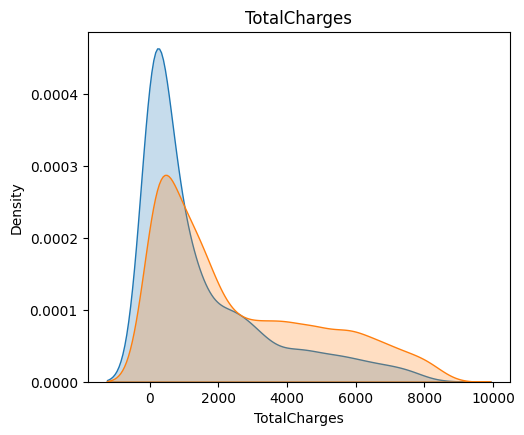

In [35]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(2, 2, 1)
ax = sns.kdeplot(df["TotalCharges"][df["Churn"]=="Yes"] ,fill = True)
ax = sns.kdeplot(df["TotalCharges"][df["Churn"]=="No"], fill = True)
ax.set_title("TotalCharges")


Customers with short tenure are more churn.

Customers with paid more on monthly charges have higher churn rates.

Customers with high total charges tend to churn.

LABEL ENCODING

In [36]:
def label_encoding(df,features):
    for i in features:
        df[i] = df[i].map({"Yes":1, "No":0})
    return df

In [37]:
label_columns = ["Partner","Dependents","PhoneService", "Churn","PaperlessBilling"]

df = label_encoding(df,label_columns)
df["gender"] = df["gender"].map({"Female":1, "Male":0})

In [38]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,1,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
5575-GNVDE,0,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
3668-QPYBK,0,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
7795-CFOCW,0,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
9237-HQITU,1,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


One Hot Encoding

In [39]:
categorical_features = ["MultipleLines","InternetService","OnlineSecurity","OnlineBackup",
                "DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaymentMethod"]
df_ohe = pd.get_dummies(df, columns=categorical_features)

In [40]:
df_ohe.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMetho

Feature Scaling : MinMaxScaler can make numerical variables scaled from the range 0 to 1. Feature scaling is important to interpret machine learning models to have features on the same scale. 

In [41]:
def minmax_scale(data,feature_range=(0,1)):
    min_val,max_val=feature_range
    data_min=np.min(data,axis=0)
    data_max=np.max(data,axis=0)

    scaled_data=(data-data_min)/(data_max-data_min)*(max_val-min_val)+min_val
    return scaled_data
    

In [42]:
features = ["tenure","MonthlyCharges","TotalCharges"]

df_minmax = pd.DataFrame(df, columns=features)
df_remain = df_ohe.drop(columns=features)

rescaled = minmax_scale(df_minmax.values, feature_range=(0, 1))

rescaled_df = pd.DataFrame(rescaled, columns=features, index=df_remain.index)

df = pd.concat([rescaled_df,df_remain],axis=1)

In [43]:
int_cols = df.select_dtypes(include=['int']).columns
bool_cols = df.select_dtypes(include=['bool']).columns

In [44]:
df[int_cols] = df[int_cols].astype(float)
df[bool_cols] = df[bool_cols].astype(float)

In [45]:
df

,tenure,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0.000000,0.115423,0.001275,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5575-GNVDE,0.464789,0.385075,0.215867,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3668-QPYBK,0.014085,0.354229,0.010310,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
7795-CFOCW,0.619718,0.239303,0.210241,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
9237-HQITU,0.014085,0.521891,0.015330,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,0.323944,0.662189,0.227521,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2234-XADUH,1.000000,0.845274,0.847461,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4801-JZAZL,0.140845,0.112935,0.037809,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


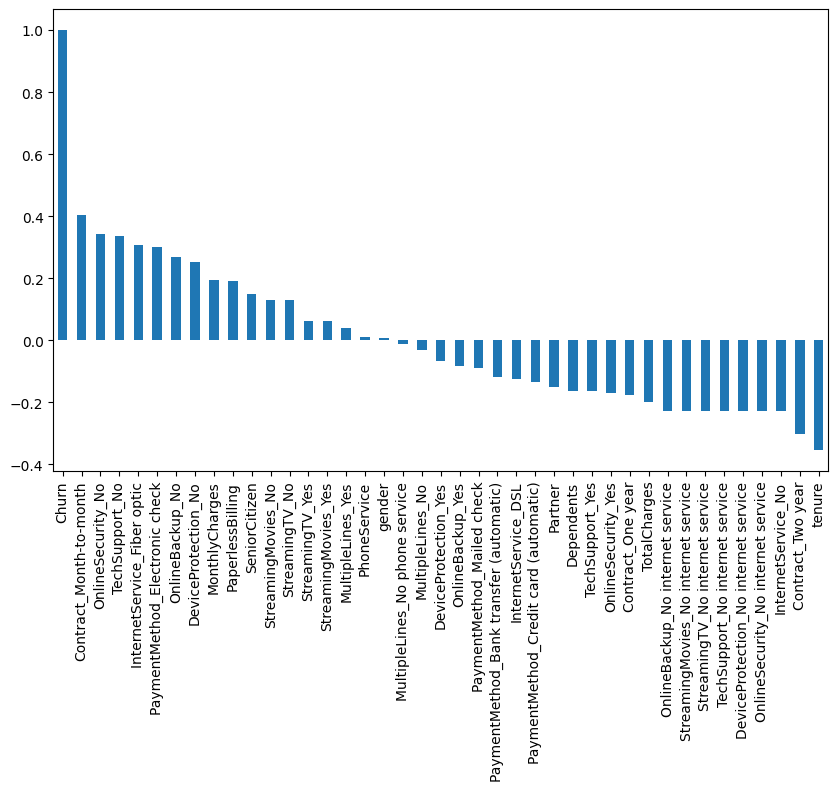

In [46]:
plt.figure(figsize=(10,6))
df.corr()["Churn"].sort_values(ascending=False).plot(kind="bar")
plt.show()

The highest correlation is the Contract_Month-to-month variable so that variable is so related to churn rate. Tenure is had a negative correlation with churn so higher values from tenure make a lower churn.

In [47]:
df.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'gender', 'SeniorCitizen',
       'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMetho

In [48]:
import numpy as np

def generate_train_test_split(X, Y, test_size=0.2, random_state=None, shuffle=True):
    # Convert X and Y to numpy arrays if they aren't already
    X = np.array(X)
    Y = np.array(Y)

    # Ensure that X and Y have compatible shapes
    assert len(X) == len(Y), "The number of samples in X and Y must be equal."

    # Set the random seed if random_state is specified
    if random_state is not None:
        np.random.seed(random_state)

    # Get the number of samples
    num_samples = len(X)

    # Generate indices for shuffling
    indices = np.arange(num_samples)

    if shuffle:
        np.random.shuffle(indices)

    # Determine the number of test samples
    if isinstance(test_size, float):
        if 0.0 < test_size < 1.0:
            num_test_samples = int(np.floor(test_size * num_samples))
        else:
            raise ValueError("test_size as a float must be between 0 and 1.")
    elif isinstance(test_size, int):
        if 0 < test_size < num_samples:
            num_test_samples = test_size
        else:
            raise ValueError("test_size as an int must be between 0 and the number of samples.")
    else:
        raise ValueError("test_size must be a float or int.")

    # Split the indices
    test_indices = indices[:num_test_samples]
    train_indices = indices[num_test_samples:]

    # Split the data
    X_train = X[train_indices]
    X_test = X[test_indices]
    Y_train = Y[train_indices]
    Y_test = Y[test_indices]

    return X_train, X_test, Y_train, Y_test

In [49]:
X = df.drop(columns = ["Churn"])
y = df["Churn"].values


In [131]:
feature_names=X.columns

In [50]:
X.shape[0]

7032

In [51]:
X_train,X_test, y_train, y_test = generate_train_test_split(X,y,test_size=0.2,random_state=42)

In [52]:
X_train.shape

(5626, 40)

In [53]:
df.dtypes

tenure                                     float64
MonthlyCharges                             float64
TotalCharges                               float64
gender                                     float64
SeniorCitizen                              float64
Partner                                    float64
Dependents                                 float64
PhoneService                               float64
PaperlessBilling                           float64
Churn                                      float64
MultipleLines_No                           float64
MultipleLines_No phone service             float64
MultipleLines_Yes                          float64
InternetService_DSL                        float64
InternetService_Fiber optic                float64
InternetService_No                         float64
OnlineSecurity_No                          float64
OnlineSecurity_No internet service         float64
OnlineSecurity_Yes                         float64
OnlineBackup_No                

In [54]:
class CustomLogisticRegression:
    def __init__(self, lr=0.5, epochs=5000):
        self.lr = lr  # Learning rate
        self.epochs = epochs  # Number of iterations
        self.weights = None
        self.intercept = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))  # Sigmoid activation function

    def fit(self, X, y):
        X = np.insert(X, 0, 1, axis=1)  # This bias term allows the model to learn an intercept term
        n_samples, n_features = X.shape
        
        self.weights = np.ones(n_features) # initializes the weights (parameters) to ones. 

        for _ in range(self.epochs):
            # computes the predicted probabilities for all samples
            y_hat = self.sigmoid(np.dot(X, self.weights))


            # calculates the gradient of the loss function with respect to the weights 
            gradient = np.dot(X.T, (y_hat - y)) / n_samples

            # Update the weights
            self.weights -= self.lr * gradient #updates the weights in the opposite direction of the gradient 
        
        # Separate coefficients and intercept
        self.intercept = self.weights[0]
        self.coef_ = self.weights[1:]


    def predict(self, X):

        # Add bias term
        X = np.insert(X, 0, 1, axis=1)

        # Compute linear combination
        linear_combination = np.dot(X, self.weights)

        # Compute probabilities
        probabilities = self.sigmoid(linear_combination)

        # Convert probabilities to class labels
        return (probabilities >= 0.5).astype(int)

    def evaluate(self, X, y_true):

        y_pred = self.predict(X)

        # Compute evaluation metrics without sklearn
        accuracy = self.accuracy(y_true, y_pred)
        precision = self.precision(y_true, y_pred)
        recall = self.recall(y_true, y_pred)
        conf_matrix = self.confusion_matrix(y_true, y_pred)

        return accuracy, precision, recall, conf_matrix

    def display_weights(self, feature_names):

        print("Shape of self.coef_:", self.coef_.shape)  # Debugging line
        print("Shape of feature_names:", len(feature_names))  # Debugging line
    
        # Create a Pandas Series for the weights
        weights = pd.Series(self.coef_.flatten(), index=feature_names)

        # Top 10 weights
        print("Top 10 weights:")
        top_weights = weights.sort_values(ascending=False).head(10)
        top_weights.plot(kind='bar')
        plt.title('Top 10 Weights')
        plt.show()

        # Bottom 10 weights
        print("\nBottom 10 weights:")
        bottom_weights = weights.sort_values(ascending=False).tail(10)
        bottom_weights.plot(kind='bar')
        plt.title('Bottom 10 Weights')
        plt.show()

        return top_weights, bottom_weights

    def accuracy(self, y_true, y_pred):
        
        return np.mean(y_true == y_pred)

    def precision(self, y_true, y_pred):
        
        true_positives = np.sum((y_pred == 1) & (y_true == 1))
        predicted_positives = np.sum(y_pred == 1)
        return true_positives / predicted_positives if predicted_positives > 0 else 0

    def recall(self, y_true, y_pred):
        
        true_positives = np.sum((y_pred == 1) & (y_true == 1))
        actual_positives = np.sum(y_true == 1)
        return true_positives / actual_positives if actual_positives > 0 else 0

    def confusion_matrix(self, y_true, y_pred):
        
        tp = np.sum((y_pred == 1) & (y_true == 1))
        tn = np.sum((y_pred == 0) & (y_true == 0))
        fp = np.sum((y_pred == 1) & (y_true == 0))
        fn = np.sum((y_pred == 0) & (y_true == 1))
        return np.array([[tn, fp],
                         [fn, tp]])

In [55]:
model_custom=CustomLogisticRegression()

In [56]:
model_custom.fit(X_train, y_train)

In [57]:
y_pred=model_custom.predict(X_test)

In [58]:
# In built prediction function (y_pred)
accuracy, precision, recall, conf_matrix = model_custom.evaluate(X_test,y_test)


In [59]:
accuracy

0.7880512091038406

In [60]:
precision

0.6225806451612903

In [61]:
recall

0.516042780748663

In [62]:
conf_matrix

array([[915, 117],
       [181, 193]])

Shape of self.coef_: (40,)
Shape of feature_names: 40
Top 10 weights:


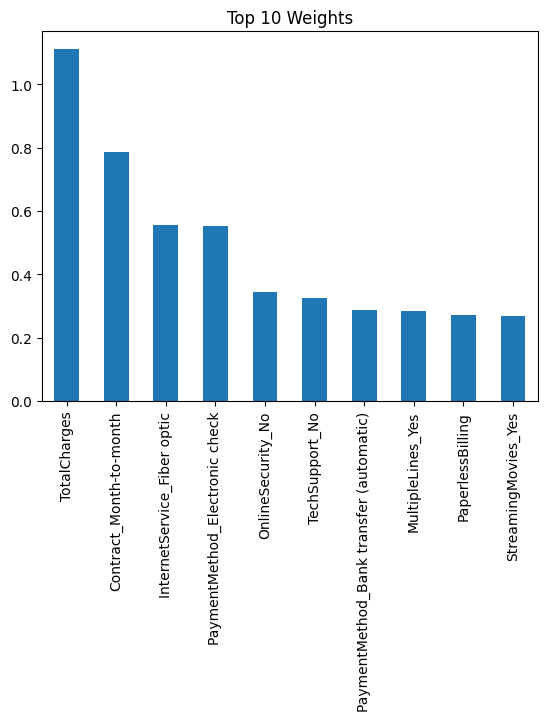


Bottom 10 weights:


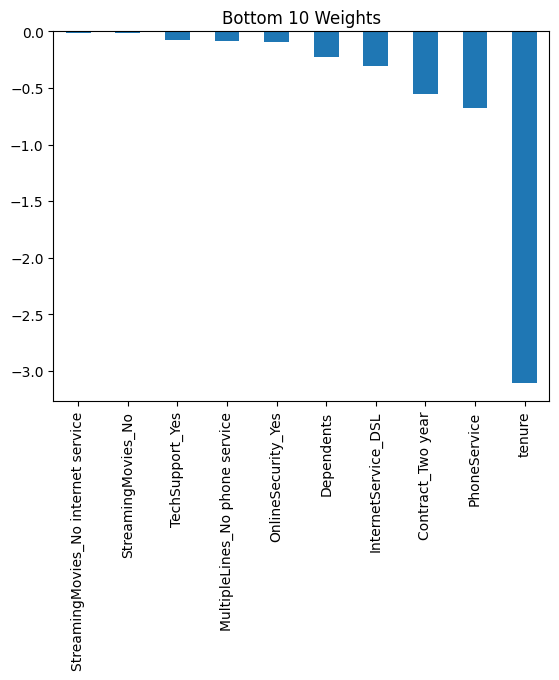

In [63]:
top_weights, bottom_weights = model_custom.display_weights(X.columns)

In [127]:
class Perceptron:
    def __init__(self, learning_rate=0.1, iterations=5000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        # Add a bias term (1) to the input features
        X = np.insert(X, 0, 1, axis=1)  # This bias term allows the model to learn an intercept term
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)  # Initialize weights to zeros

        # Training the perceptron
        for _ in range(self.iterations):
            # Select a random sample
            j = np.random.randint(0, n_samples)
            x_j = X[j]
            y_j = y[j]

            # Compute the predicted probability
            y_hat = self.sigmoid(np.dot(x_j, self.weights))

            # Update weights based on the error
            error = y_j - y_hat
            self.weights += self.learning_rate * error * x_j

    def predict(self, X):
        # Add a bias term to the input features for prediction
        X = np.insert(X, 0, 1, axis=1)  # Adding a bias column
        linear_output = np.dot(X, self.weights)
        y_predicted = self.sigmoid(linear_output)
        return [1 if i > 0.5 else 0 for i in y_predicted]

    def accuracy(self, y_true, y_pred):
        return np.mean(y_true == y_pred)

    def precision(self, y_true, y_pred):
        true_positives = np.sum((y_pred == 1) & (y_true == 1))
        predicted_positives = np.sum(y_pred == 1)
        return true_positives / predicted_positives if predicted_positives > 0 else 0

    def recall(self, y_true, y_pred):
        true_positives = np.sum((y_pred == 1) & (y_true == 1))
        actual_positives = np.sum(y_true == 1)
        return true_positives / actual_positives if actual_positives > 0 else 0

    def confusion_matrix(self, y_true, y_pred):
        tp = np.sum((y_pred == 1) & (y_true == 1))
        tn = np.sum((y_pred == 0) & (y_true == 0))
        fp = np.sum((y_pred == 1) & (y_true == 0))
        fn = np.sum((y_pred == 0) & (y_true == 1))
        return np.array([[tn, fp],
                         [fn, tp]])

In [123]:
model_perceptron = Perceptron(learning_rate=0.01, iterations=1000)

In [124]:
model_perceptron.fit(X_train,y_train)

In [125]:
y_pred1 = model_perceptron.predict(X_test)

In [126]:
acc=model_perceptron.accuracy(y_test,y_pred1)
acc

0.7446657183499289

In [69]:
selected_features = top_weights.index.tolist()
selected_features

['TotalCharges',
 'Contract_Month-to-month',
 'InternetService_Fiber optic',
 'PaymentMethod_Electronic check',
 'OnlineSecurity_No',
 'TechSupport_No',
 'PaymentMethod_Bank transfer (automatic)',
 'MultipleLines_Yes',
 'PaperlessBilling',
 'StreamingMovies_Yes']

In [70]:
X_rfe = X[selected_features]

In [71]:
X_train,X_test, y_train, y_test = generate_train_test_split(X_rfe,y,test_size=0.2,random_state=42)

In [72]:
new_model = CustomLogisticRegression()
new_model.fit(X_train, y_train)

In [73]:
accuracy, precision, recall, conf_matrix = new_model.evaluate(X_test,y_test)

In [74]:
accuracy

0.783072546230441

In [75]:
precision

0.6146179401993356

In [76]:
recall

0.4946524064171123

In [77]:
conf_matrix

array([[916, 116],
       [189, 185]])

In [78]:
# CHI2- X2 = SUMMATION[(0-E)2/E] , O is observered frequency, E is expected frequency,

In [79]:
def chi2_feature_selection(df, target, top_k):
    chi2_values = {}
    for col in df.columns:
        if col != target:
            contingency_table = pd.crosstab(df[col], df[target])
            observed = contingency_table.values
            total = observed.sum()
            expected = np.outer(contingency_table.sum(axis=1), contingency_table.sum(axis=0)) / total
            chi2 = ((observed - expected) ** 2 / expected).sum()
            chi2_values[col] = chi2
    # Sort features based on chi-squared value
    selected_features = sorted(chi2_values.items(), key=lambda x: x[1], reverse=True)[:top_k]
    return [feature for feature, score in selected_features]


In [80]:
top_features = chi2_feature_selection(df, 'Churn', top_k=10)
print("Selected Features:", top_features)

Selected Features: ['TotalCharges', 'MonthlyCharges', 'Contract_Month-to-month', 'tenure', 'OnlineSecurity_No', 'TechSupport_No', 'InternetService_Fiber optic', 'Contract_Two year', 'PaymentMethod_Electronic check', 'OnlineBackup_No']


In [81]:
def rfe_feature_selection(df, target, num_features):
    X = df.drop(columns=[target]).values
    y = df[target].values
    feature_names = list(df.drop(columns=[target]).columns)
    
    while len(feature_names) > num_features:
        # Fit custom logistic regression
        model = CustomLogisticRegression(lr=0.5, epochs=5000)
        model.fit(X, y)
        
        # Get the absolute value of coefficients (excluding intercept)
        coef_abs = np.abs(model.coef_)
        
        # Find the least important feature (smallest coefficient)
        least_important_idx = np.argmin(coef_abs)
        
        # Remove the least important feature from X and feature_names
        X = np.delete(X, least_important_idx, axis=1)
        del feature_names[least_important_idx]
        
    return feature_names

In [82]:
selected_features = rfe_feature_selection(df, 'Churn', num_features=10)
print("Selected Features:", selected_features)


Selected Features: ['tenure', 'TotalCharges', 'PhoneService', 'PaperlessBilling', 'InternetService_Fiber optic', 'OnlineSecurity_No', 'TechSupport_No', 'Contract_Month-to-month', 'Contract_Two year', 'PaymentMethod_Electronic check']


In [83]:
X_selected_chi2=df[top_features].values
X_selected_rfe=df[selected_features].values
y=df['Churn'].values

In [84]:
X_train_rfe,X_test_rfe, y_train_rfe, y_test_rfe = generate_train_test_split(X_selected_rfe,y,test_size=0.2,random_state=42)
X_train_chi,X_test_chi, y_train_chi, y_test_chi = generate_train_test_split(X_selected_chi2,y,test_size=0.2,random_state=42)

In [85]:
model_chi2 = CustomLogisticRegression(lr=0.5, epochs=5000)
model_chi2.fit(X_train_chi, y_train_chi)

accuracy, precision, recall, conf_matrix = model_chi2.evaluate(X_test_chi, y_test_chi)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7901849217638691
Precision: 0.627831715210356
Recall: 0.5187165775401069
Confusion Matrix:
[[917 115]
 [180 194]]


In [86]:
model_rfe = CustomLogisticRegression(lr=0.5, epochs=5000)
model_rfe.fit(X_train_rfe, y_train_rfe)

accuracy, precision, recall, conf_matrix = model_rfe.evaluate(X_test_rfe, y_test_rfe)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7923186344238976
Precision: 0.6339869281045751
Recall: 0.5187165775401069
Confusion Matrix:
[[920 112]
 [180 194]]


CustomLogisticRegression is an implementation of logistic regression using batch gradient descent.

initialization : lr, epochs, weights and intercepts
sigmoid: Convert the linear combination of inputs and weights into a probability between 0 and 1.


Updates weights based on the average gradient over all samples.
The gradient is scaled by 1 / n_samples.


training:
1. adding a bias term, which is the intercept. Another weight in vecotrized operations
2. inital weights set to 1.
3. gradient descent loop starts, where predicted probability y_hat is found which is the linear combination of inputs and weights applied the sigmoid function to get probabilities.
4. then loss is calculated
5. weights updated

perceptron class uses stochastic gradient descent (SGD) 
Weights initialized to zero
for each iteration, sample is chosen and probability is found. Based on the error the weights are updated.

Updates weights immediately after computing the gradient for a single sample.



In [87]:
def feature_weights(X_df, classifier, classifier_name):
    weights = pd.Series(classifier.coef_[0], index = X_df.columns.values).sort_values(ascending=False)
    
    top_10_weights = weights[:10]
    plt.figure(figsize=(7,6))
    plt.title(f"{classifier_name} - Top 10 Features")
    top_10_weights.plot(kind="bar")
    
    bottom_10_weights = weights[len(weights)-10:]
    plt.figure(figsize=(7,6))
    plt.title(f"{classifier_name} - Bottom 10 Features")
    bottom_10_weights.plot(kind="bar")
    print("")

In [88]:
            # loss function -> -1/m [ylog(sigmoid(wx)) +(1-y)log(1-sigmoid(ws)]

In [136]:
def preprocess_data(df):
    # Convert 'TotalCharges' to numeric, handling errors
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

    # Handle missing values in 'TotalCharges' (optional)
    df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

    # Label encoding for certain columns
    def label_encoding(df, features):
        for i in features:
            df[i] = df[i].map({"Yes": 1, "No": 0})
        return df

    label_columns = ["Partner", "Dependents", "PhoneService", "PaperlessBilling"]
    df = label_encoding(df, label_columns)

    # Encode 'gender'
    df["gender"] = df["gender"].map({"Female": 1, "Male": 0})

    # One-hot encoding for categorical features
    categorical_features = ["MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup",
                            "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies",
                            "Contract", "PaymentMethod"]

    df = pd.get_dummies(df, columns=categorical_features)

    # Min-max scaling
    def minmax_scale(data, feature_range=(0, 1)):
        min_val, max_val = feature_range
        data_min = np.min(data, axis=0)
        data_max = np.max(data, axis=0)

        scaled_data = (data - data_min) / (data_max - data_min) * (max_val - min_val) + min_val
        return scaled_data

    features = ["tenure", "MonthlyCharges", "TotalCharges"]
    df_minmax = df[features]
    df_remain = df.drop(columns=features)

    rescaled = minmax_scale(df_minmax.values, feature_range=(0, 1))
    rescaled_df = pd.DataFrame(rescaled, columns=features, index=df_remain.index)

    df = pd.concat([rescaled_df, df_remain], axis=1)

    # Convert integer and boolean columns to float
    int_cols = df.select_dtypes(include=['int']).columns
    bool_cols = df.select_dtypes(include=['bool']).columns

    df[int_cols] = df[int_cols].astype(float)
    df[bool_cols] = df[bool_cols].astype(float)

    return df

In [129]:
def preprocess_user_input(user_input, feature_columns):
    # Convert user input to DataFrame
    user_df = pd.DataFrame([user_input])

    # Preprocess the user input
    user_processed = preprocess_data(user_df)

    # Align columns with the training data
    user_processed = user_processed.reindex(columns=feature_columns, fill_value=0)

    return user_processed

In [132]:
user_input = {
    'gender': 'Female',
    'SeniorCitizen': '0',
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 5,
    'PhoneService': 'Yes',
    'MultipleLines': 'No',
    'InternetService': 'DSL',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 75.3,
    'TotalCharges': ' '
}

In [133]:
if user_input['TotalCharges'] == ' ' or user_input['TotalCharges'] == '':
    user_input['TotalCharges'] = float(user_input['MonthlyCharges']) * float(user_input['tenure'])
else:
    user_input['TotalCharges'] = float(user_input['TotalCharges'])


In [139]:
user_processed = preprocess_user_input(user_input, feature_columns=feature_names)
user_processed = user_processed.astype(float)
user_prediction = model_custom.predict(user_processed.values)

if user_prediction[0] == 1:
    print("The customer is likely to churn.")
else:
    print("The customer is not likely to churn.")

The customer is not likely to churn.
